In [236]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import json
import warnings
warnings.filterwarnings("ignore")

## Unemployment Rate - 20 yrs. & over, Men

In [2]:
base_url="https://api.bls.gov/publicAPI/v2/timeseries/data/"

In [3]:
series_id='LNS14000025'

In [4]:
source=base_url+series_id+"?"+"registrationkey=517a0081e22e4fb38e6de19cde7b32bd"+"&startyear=2016&endyear=2021"

In [5]:
#get data from API
req = requests.get(source)
data = req.json()

In [6]:
#Load the df
male_unemployment = pd.DataFrame.from_dict(data['Results']['series'][0]['data'])
#Drop cols
male_unemployment= male_unemployment.drop(columns=["latest","footnotes"])

In [7]:
male_unemployment.dtypes

year          object
period        object
periodName    object
value         object
dtype: object

In [8]:
#check for nulls
male_unemployment.isnull().sum()

year          0
period        0
periodName    0
value         0
dtype: int64

In [9]:
# change the data type of year and value
male_unemployment["year"] = pd.to_numeric(male_unemployment["year"])
male_unemployment["value"] = pd.to_numeric(male_unemployment["value"])

In [10]:
male_unemployment.describe()

,year,value
count,70.000000,70.000000
mean,2018.428571,4.718571
std,1.690309,1.932356
min,2016.000000,3.100000
25%,2017.000000,3.600000
50%,2018.000000,4.100000
75%,2020.000000,4.700000
max,2021.000000,13.100000


In [11]:
#sort df by year, period, periodName
male_unemployment=male_unemployment.sort_values(["year","period","periodName"])

# Men Unemployment Rate Yearly Analysis

Text(0.5, 0.98, "Men's Unemployment Rate Over Time")

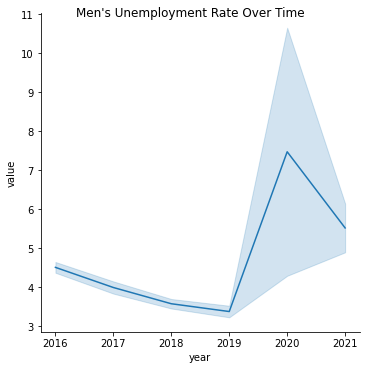

In [22]:
#create lineplot
men_y_line=sns.relplot(x="year", y="value", data=male_unemployment, kind="line", ci='sd')
men_y_line.fig.suptitle("Men Unemployment Rate Over Time")

Text(0.5, 0.98, 'Men Unemployment Rate Distribution Over Time')

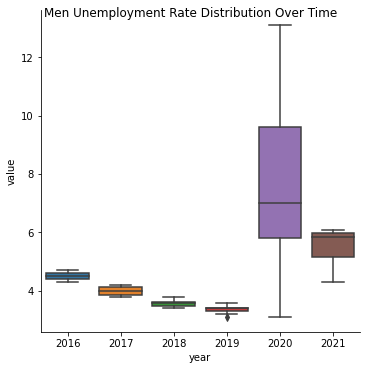

In [26]:
#create boxplot
men_y_boxplot=sns.catplot(x="year", y="value",data=male_unemployment,kind="box")
men_y_boxplot.fig.suptitle("Men Unemployment Rate Distribution Over Time")

# Unemployment Rate - 20 yrs. & over, Women

In [30]:
#get data from API
series_id='LNS14000026'
source=base_url+series_id+"?"+"registrationkey=517a0081e22e4fb38e6de19cde7b32bd"+"&startyear=2016&endyear=2021"
req = requests.get(source)
data = req.json()
data

{'status': 'REQUEST_SUCCEEDED',
 'responseTime': 187,
 'message': [],
 'Results': {'series': [{'seriesID': 'LNS14000026',
    'data': [{'year': '2021',
      'period': 'M10',
      'periodName': 'October',
      'latest': 'true',
      'value': '4.4',
      'footnotes': [{}]},
     {'year': '2021',
      'period': 'M09',
      'periodName': 'September',
      'value': '4.2',
      'footnotes': [{}]},
     {'year': '2021',
      'period': 'M08',
      'periodName': 'August',
      'value': '4.8',
      'footnotes': [{}]},
     {'year': '2021',
      'period': 'M07',
      'periodName': 'July',
      'value': '5.0',
      'footnotes': [{}]},
     {'year': '2021',
      'period': 'M06',
      'periodName': 'June',
      'value': '5.5',
      'footnotes': [{}]},
     {'year': '2021',
      'period': 'M05',
      'periodName': 'May',
      'value': '5.4',
      'footnotes': [{}]},
     {'year': '2021',
      'period': 'M04',
      'periodName': 'April',
      'value': '5.6',
      'footnote

In [264]:
# convert to df, remove cols,sort values
female_unemployment = pd.DataFrame.from_dict(data['Results']['series'][0]['data'])
female_unemployment= female_unemployment.drop(columns=["latest","footnotes"])
female_unemployment=female_unemployment.sort_values("period")

In [265]:
# convert dtypes of cols
female_unemployment["value"] = pd.to_numeric(female_unemployment["value"])
female_unemployment["year"] = pd.to_numeric(female_unemployment["year"])

Text(0.5, 0.98, 'Women Unemployment Rate Over Time')

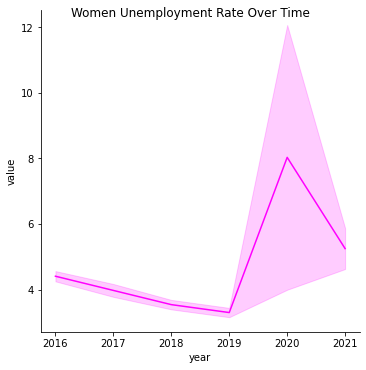

In [266]:
# create line plot
women_y_line=sns.relplot(x="year", y="value", data=female_unemployment, kind="line", ci='sd',color="Magenta")
women_y_line.fig.suptitle("Women Unemployment Rate Over Time")

Text(0.5, 0.98, 'Women Unemployment Rate Distribution Over Time')

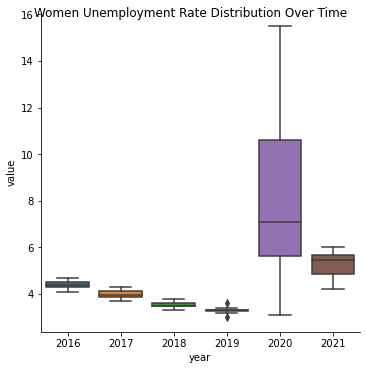

In [55]:
#create boxplot
women_y_boxplot=sns.catplot(x="year", y="value",data=female_unemployment,kind="box")
women_y_boxplot.fig.suptitle("Women Unemployment Rate Distribution Over Time")

# Merge Gender DataFrames

In [151]:
#rename df for new df
male_unemployment=male_unemployment.rename(columns={"value": "men"})
female_unemployment=female_unemployment.rename(columns={"value": "women"})

In [41]:
#merge the male & female df
gender= pd.merge(male_unemployment,female_unemployment,on=['year','period','periodName'])
gender

,year,period,periodName,men,women
0,2016,M01,January,4.3,4.5
1,2016,M02,February,4.4,4.5
2,2016,M03,March,4.5,4.7
3,2016,M04,April,4.7,4.6
4,2016,M05,May,4.4,4.3
...,...,...,...,...,...
65,2021,M06,June,5.9,5.5
66,2021,M07,July,5.4,5.0
67,2021,M08,August,5.1,4.8
68,2021,M09,September,4.7,4.2


In [42]:
gender.describe()

,year,men,women
count,70.000000,70.000000,70.000000
mean,2018.428571,4.718571,4.737143
std,1.690309,1.932356,2.306712
min,2016.000000,3.100000,3.000000
25%,2017.000000,3.600000,3.500000
50%,2018.000000,4.100000,4.050000
75%,2020.000000,4.700000,4.675000
max,2021.000000,13.100000,15.500000


Text(0.5, 0.95, 'Unemployment Rate Distribution Over Time by Gender')

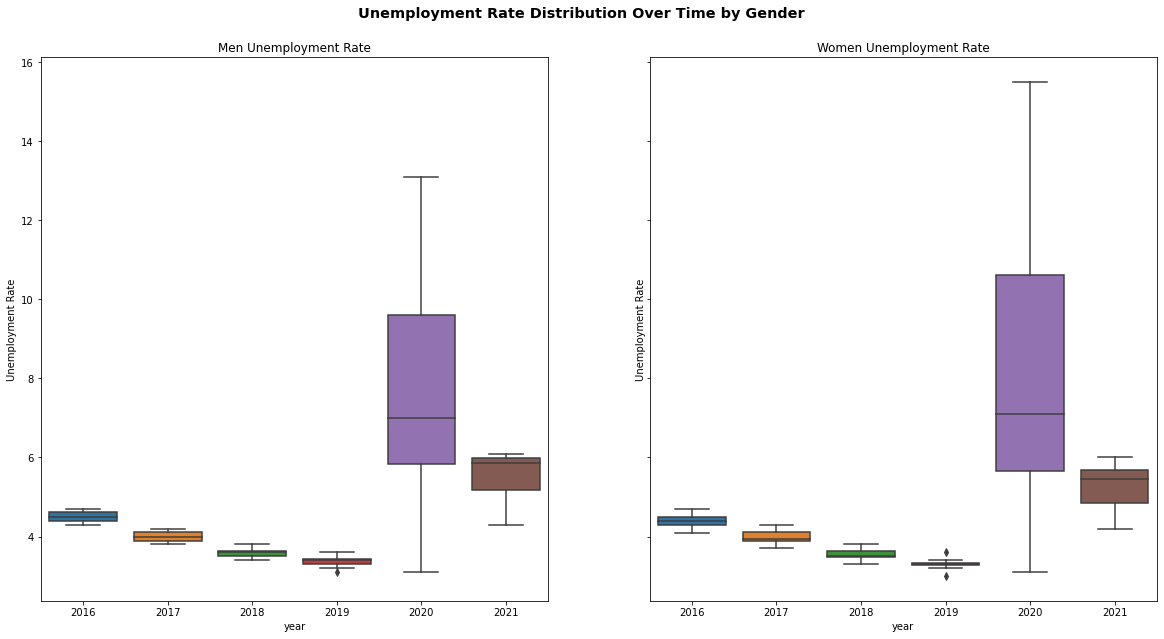

In [284]:
#create boxplots
fig, axes = plt.subplots(1, 2, sharey=True,figsize=(20,10))
sns.boxplot(ax=axes[0], data=gender, x='year', y='men')
sns.boxplot(ax=axes[1], data=gender, x='year', y='women')
axes[0].set_ylabel('Unemployment Rate')
axes[1].set_ylabel('Unemployment Rate')
axes[0].set_title('Men Unemployment Rate')
axes[1].set_title('Women Unemployment Rate')
plt.suptitle("Unemployment Rate Distribution Over Time by Gender",y=.95, size='x-large',weight='bold')

In [153]:
#men's yearly average rate 
men_y_avg=pd.DataFrame(male_unemployment.groupby('year')['men'].mean())
men_y_avg

,men
year,
2016,4.508333
2017,3.991667
2018,3.575000
2019,3.375000
2020,7.475000
2021,5.520000


In [154]:
#women's yearly average rate
women_y_avg=pd.DataFrame(female_unemployment.groupby('year')['women'].mean())
women_y_avg

,women
year,
2016,4.408333
2017,3.975000
2018,3.541667
2019,3.300000
2020,8.033333
2021,5.250000


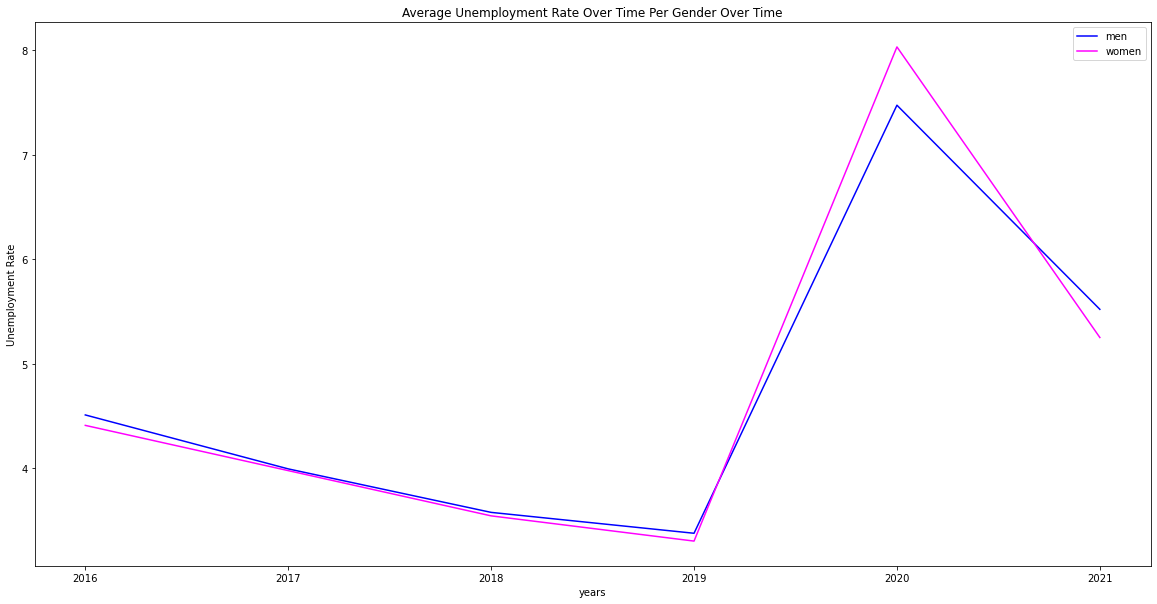

In [287]:
# create line plot for genders
fig, ax = plt.subplots(figsize=(20,10))
ax.plot( men_y_avg.index, 'men', data=men_y_avg, color='blue')
ax.plot( women_y_avg.index, 'women', data=women_y_avg, color='magenta')
ax.set_title('Average Unemployment Rate Over Time Per Gender Over Time')
ax.set_xlabel('years')
ax.set_ylabel('Unemployment Rate')
plt.legend()

In [208]:
#subset each year for male
m_2016 = male_unemployment[male_unemployment["year"]==2016]
m_2017 = male_unemployment[male_unemployment["year"]==2017]
m_2018 = male_unemployment[male_unemployment["year"]==2018]
m_2019 = male_unemployment[male_unemployment["year"]==2018]
m_2020 = male_unemployment[male_unemployment["year"]==2020]

In [212]:
#subset each year for female
f_2016 = female_unemployment[female_unemployment["year"]==2016]
f_2017 = female_unemployment[female_unemployment["year"]==2017]
f_2018 = female_unemployment[female_unemployment["year"]==2018]
f_2019 = female_unemployment[female_unemployment["year"]==2018]
f_2020 = female_unemployment[female_unemployment["year"]==2020]

Text(0.5, 1.0, 'Unemployment Rate Per Month from 2016 to 2019')

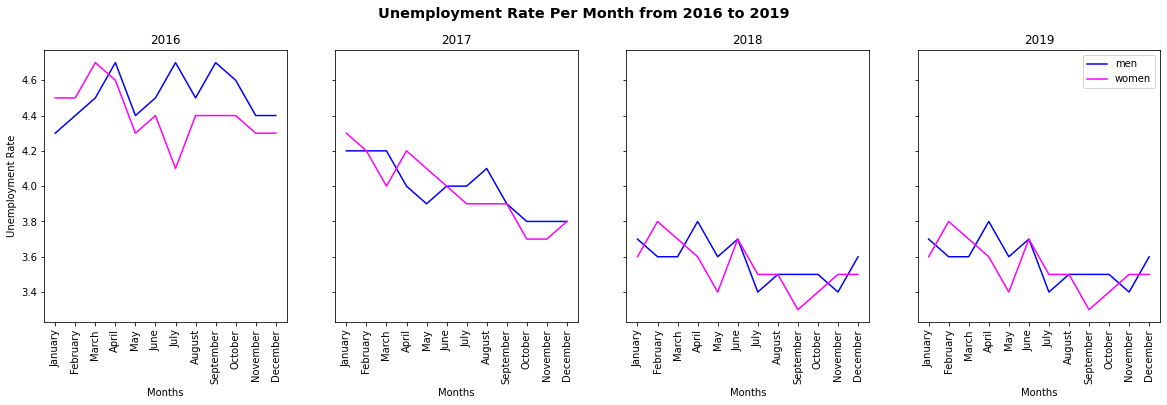

In [288]:
# line plot for each year by gender
fig, ax = plt.subplots(1,4,figsize=(20,5),sharey=True)

ax[0].plot(m_2016["periodName"],m_2016["men"],color='blue',label="men")
ax[0].plot(f_2016["periodName"],f_2016["women"],color='magenta',label="women")

ax[1].plot(m_2017["periodName"],m_2017["men"],color='blue',label="men")
ax[1].plot(f_2017["periodName"],f_2017["women"],color='magenta',label="women")

ax[2].plot(m_2018["periodName"],m_2018["men"],color='blue',label="men")
ax[2].plot(f_2018["periodName"],f_2018["women"],color='magenta',label="women")


ax[3].plot(m_2019["periodName"],m_2019["men"],color='blue',label="men")
ax[3].plot(f_2019["periodName"],f_2019["women"],color='magenta',label="women")


ax[0].set_ylabel('Unemployment Rate')

ax[0].set_xlabel('Months')
ax[1].set_xlabel('Months')
ax[2].set_xlabel('Months')
ax[3].set_xlabel('Months')

ax[0].set_title('2016')
ax[1].set_title('2017')
ax[2].set_title('2018')
ax[3].set_title('2019')

ax[0].set_xticklabels(m_2016["periodName"], rotation=90)
ax[1].set_xticklabels(m_2017["periodName"], rotation=90)
ax[2].set_xticklabels(m_2018["periodName"], rotation=90)
ax[3].set_xticklabels(m_2019["periodName"], rotation=90)

plt.legend()

plt.suptitle('Unemployment Rate Per Month from 2016 to 2019', y=1.00, weight='bold', size='x-large')

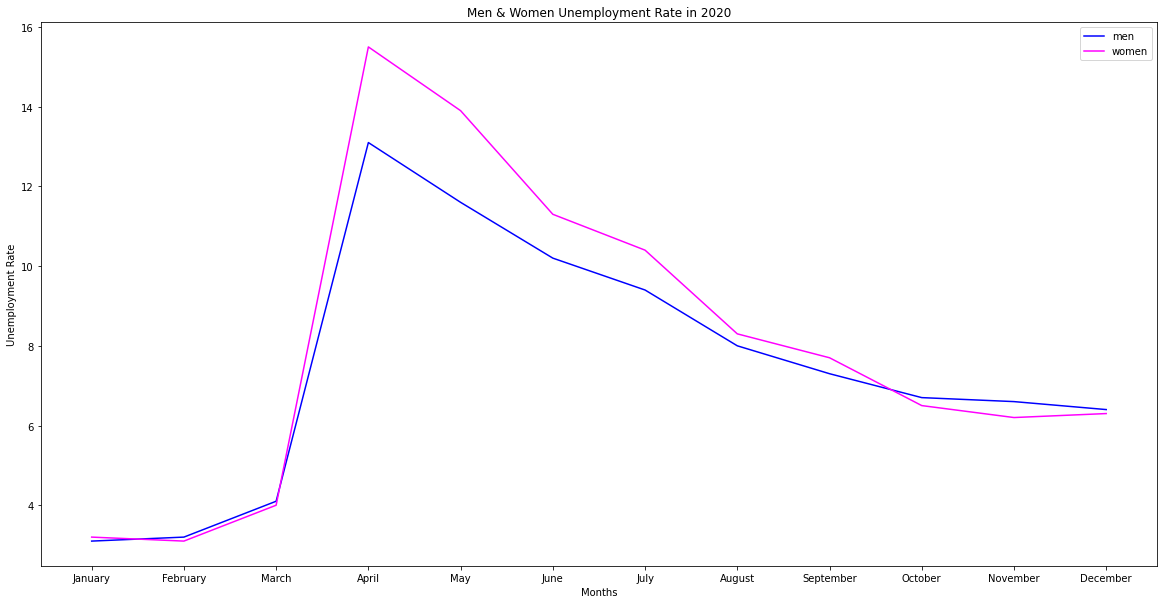

In [283]:
# closer look at 2020 
fig, ax = plt.subplots(figsize=(20,10))
ax.plot('periodName' , 'men', data=m_2020, color='blue')
ax.plot( 'periodName', 'women', data=f_2020, color='magenta')
ax.set_title('Men & Women Unemployment Rate in 2020')
ax.set_ylabel('Unemployment Rate')
ax.set_xlabel('Months')
plt.legend()

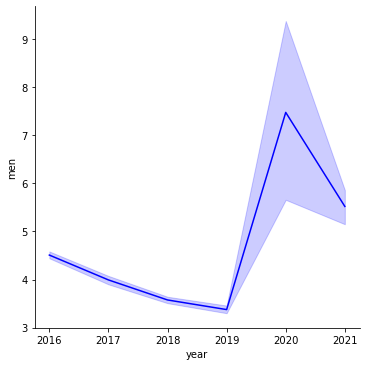

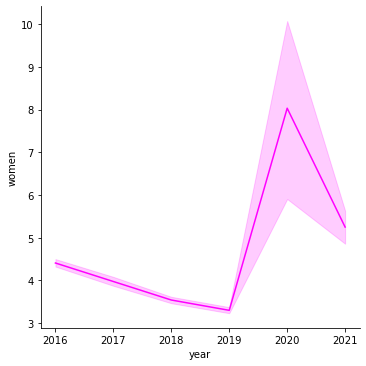

In [263]:
#recreating line plot with ci but could not put into subplot
sns.relplot(x="year", y="men", data=male_unemployment, kind="line",color="blue")
sns.relplot(x="year", y="women", data=female_unemployment, kind="line",color="magenta")


# EXCLUDE BELOW

Text(0.5, 1.0, 'Unemployment Distribution by Gender')

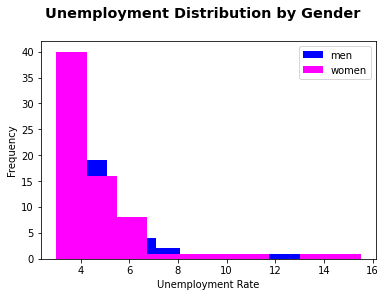

In [268]:
fig, ax = plt.subplots()
ax.hist(gender["men"],color='blue',label="men")
ax.hist(gender["women"],color='magenta',label="women")
ax.set_xlabel('Unemployment Rate')
ax.set_ylabel('Frequency')
plt.legend()
plt.suptitle('Unemployment Distribution by Gender', y=1.00, weight='bold', size='x-large')

In [292]:
g=gender[gender["year"]==2020]

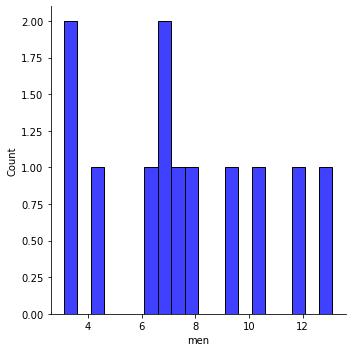

In [293]:
sns.displot(g, x="men",bins=20,color='blue')

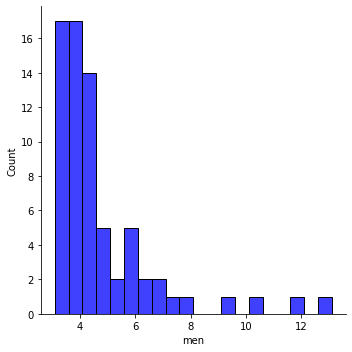

In [277]:
sns.displot(g, x="men",bins=20,color='blue')

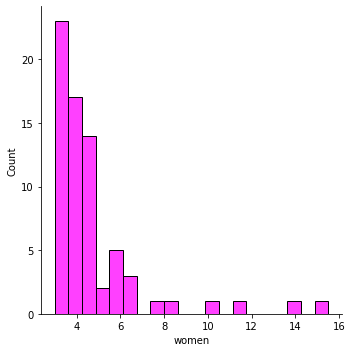

In [278]:
sns.displot(gender, x="women",bins=20,color='magenta')

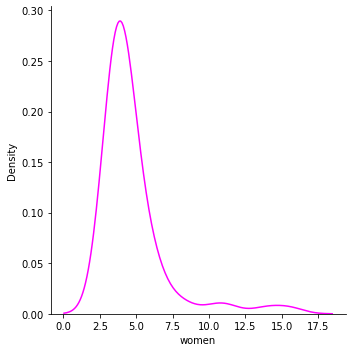

In [280]:
sns.displot(gender, x="women",color='magenta',kind="kde")

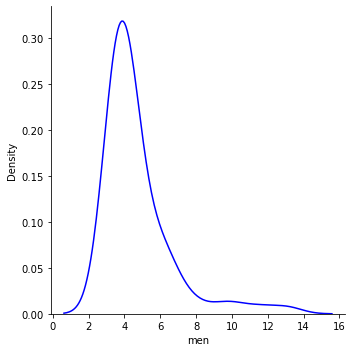

In [281]:
sns.displot(gender, x="men",color='blue',kind="kde")